In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from numpy import linalg as LA
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 2

In [3]:
# Loading Normalized log-scaled standard-deviation sorted dataframe
df = pd.read_csv('../DataSource/SRP158491_normalized_logscaled_std_sorted.csv', index_col=0)

In [6]:
# Adding labels to dataframe for cleaning purposes
metadata_df = pd.read_csv('../DataSource/metadata_SRP158491.tsv', sep='\t', index_col=0)

In [11]:
labels = metadata_df.loc[df.index]['refinebio_disease']

In [13]:
df['Group'] = labels

In [4]:
df

,CD4,CD8A,KLRC4-KLRK1,CD8B,STXBP2,ADGRG1,GINS3,GZMH,XIST,ZNG1F,...,IGHV3-43,MYADM-AS2,ALDH1A3,NDUFV1-DT,ASCL5,KCNJ12,SPRR4,HSD17B3-AS1,LOC114841035,Group
refinebio_accession_code,,,,,,,,,,,,,,,,,,,,,
SRR7725764,8.164929,0.000000,0.000000,2.165702,0.000000,2.591752,8.125052,3.048034,1.728541,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
SRR7725765,8.328641,2.373090,3.572271,2.013168,0.000000,8.683048,6.860148,8.635401,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
SRR7725767,0.000000,7.783076,6.575891,7.922238,7.388587,0.000000,9.744305,4.351330,0.000000,1.317763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
SRR7725768,0.000000,8.555245,7.407132,6.659247,0.000000,7.408645,0.404595,8.011064,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
SRR7725770,1.150113,8.135226,6.840089,8.626322,0.000000,3.858808,7.499813,2.710086,0.732019,1.150113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7726017,7.544641,0.000000,0.000000,2.802657,6.284985,0.000000,5.020313,0.000000,0.000000,6.025033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ra non treatment
SRR7726018,0.000000,7.209779,8.373188,8.040202,6.365506,3.723847,0.711232,4.589354,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ra non treatment
SRR7726019,0.000000,7.250339,8.480368,8.137742,0.000000,7.954921,1.351413,8.330927,1.752926,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ra non treatment


In [15]:
df.to_csv('../DataSource/SRP158491_normalized_logscaled_std_sorted.csv')

In [5]:
# Getting top 5000 genes in terms of log-scaled standard deviation
df_5000 = df.iloc[:, :5000]

In [6]:
df_5000

,CD4,CD8A,KLRC4-KLRK1,CD8B,STXBP2,ADGRG1,GINS3,GZMH,XIST,ZNG1F,...,PRPSAP2,CCBE1,CADM4,ZNF80,OR6F1,OGFOD2,OR10J5,SYNPO2,OR5D18,SFN
refinebio_accession_code,,,,,,,,,,,,,,,,,,,,,
SRR7725764,8.164929,0.000000,0.000000,2.165702,0.000000,2.591752,8.125052,3.048034,1.728541,0.000000,...,4.139409,0.000000,0.000000,3.554524,0.000000,2.701179,1.970822,0.000000,1.728541,2.799805
SRR7725765,8.328641,2.373090,3.572271,2.013168,0.000000,8.683048,6.860148,8.635401,0.000000,0.000000,...,4.102051,0.732929,1.672350,3.789780,0.000000,1.445388,1.151310,0.000000,0.000000,3.018521
SRR7725767,0.000000,7.783076,6.575891,7.922238,7.388587,0.000000,9.744305,4.351330,0.000000,1.317763,...,4.728602,0.000000,0.000000,3.738285,1.867194,3.344647,0.000000,0.000000,2.686165,2.479913
SRR7725768,0.000000,8.555245,7.407132,6.659247,0.000000,7.408645,0.404595,8.011064,0.000000,0.000000,...,4.711437,0.000000,0.914725,3.723145,0.000000,2.439963,0.000000,0.000000,0.000000,1.384337
SRR7725770,1.150113,8.135226,6.840089,8.626322,0.000000,3.858808,7.499813,2.710086,0.732019,1.150113,...,4.811843,0.000000,0.732019,3.539727,0.000000,2.011650,0.000000,0.732019,1.444050,2.265319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7726017,7.544641,0.000000,0.000000,2.802657,6.284985,0.000000,5.020313,0.000000,0.000000,6.025033,...,5.710154,1.463011,2.033121,3.316058,0.000000,2.393963,0.000000,1.167089,0.000000,1.167089
SRR7726018,0.000000,7.209779,8.373188,8.040202,6.365506,3.723847,0.711232,4.589354,0.000000,0.000000,...,6.054355,0.000000,1.122653,4.717653,0.000000,1.976715,0.000000,0.000000,1.122653,1.413300
SRR7726019,0.000000,7.250339,8.480368,8.137742,0.000000,7.954921,1.351413,8.330927,1.752926,0.000000,...,5.251772,0.000000,0.000000,5.009766,0.000000,1.351413,0.000000,0.000000,1.351413,1.905944


In [7]:
test = df_5000.to_numpy()

In [8]:
clustering = AgglomerativeClustering().fit(df_5000)

In [9]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
### Writing method to calculate inertia of clustering since AgglomerativeClustering doesn't come with it
### If you're gonna use KMeans it should already have that built in
def calculate_inertia(df, clustering):
    positions = df.to_numpy()
    index_map = {}
    for i in range(len(np.unique(clustering))):
        index_map[i] = []
    for i in range(len(clustering)):
        index_map[clustering[i]].append(i)
    position_means = []
    for i in range(len(np.unique(clustering))):
        position_means.append(np.mean(positions[index_map[i]], axis=0))
    inertia = 0
    for i in range(len(clustering)):
        inertia += LA.norm(position_means[clustering[i]] - positions[i])**2
    return inertia/(len(clustering) - len(np.unique(clustering)))

In [10]:
lol = calculate_inertia(df_5000, clustering.labels_)

In [26]:
def clustering_pipeline():
    inertias = []
    for i in range(2, 110):
        clustering = AgglomerativeClustering(n_clusters=i).fit(df_5000)
        inertias.append(silhouette_score(df_5000, clustering.labels_))
    xlabels = np.arange(2, 110)
    plt.plot(xlabels, inertias)
    print(inertias)

[0.5045946596283892, 0.1869697955693328, 0.17154194369668077, 0.14111640177958054, 0.1187194556374171, 0.11478630316210449, 0.11537091105772798, 0.12382582668649461, 0.11753130697821837, 0.1186864644014618, 0.11760758734426338, 0.11595811958151692, 0.10928348898481756, 0.09824866026147941, 0.09904406941709233, 0.09262665927701995, 0.09029663728766027, 0.08896001570800383, 0.08696478313734397, 0.08637792475457791, 0.08629980480430459, 0.07931233384569582, 0.08290030694825831, 0.08227202995180927, 0.08281614874144708, 0.0796066663603396, 0.07995816956653287, 0.0783535114776894, 0.07737802376855815, 0.07653529211891652, 0.07635416114080999, 0.07616289287368047, 0.07467187651013688, 0.07440686375500512, 0.07382356202220072, 0.073061440602131, 0.07274252533564661, 0.07176966470168832, 0.07026939094694007, 0.07072229814555546, 0.07097572637815114, 0.06825773170107309, 0.06808039742362731, 0.06786860065307451, 0.06565901755338803, 0.06506832669438681, 0.064504386410344, 0.06498702281730935, 0

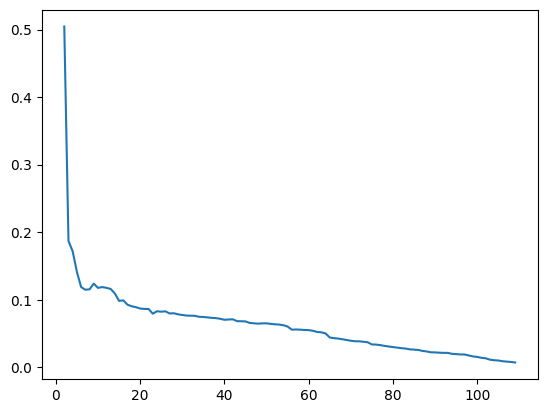

In [27]:
clustering_pipeline()

In [39]:
clustering_5000 = AgglomerativeClustering(n_clusters=15).fit(df_5000)

In [58]:
# 15 clusters probably optimal because 
# it's around 10% of the number of data points, and is near the elbow of the inertia plot

In [15]:
len(clustering.labels_)

119

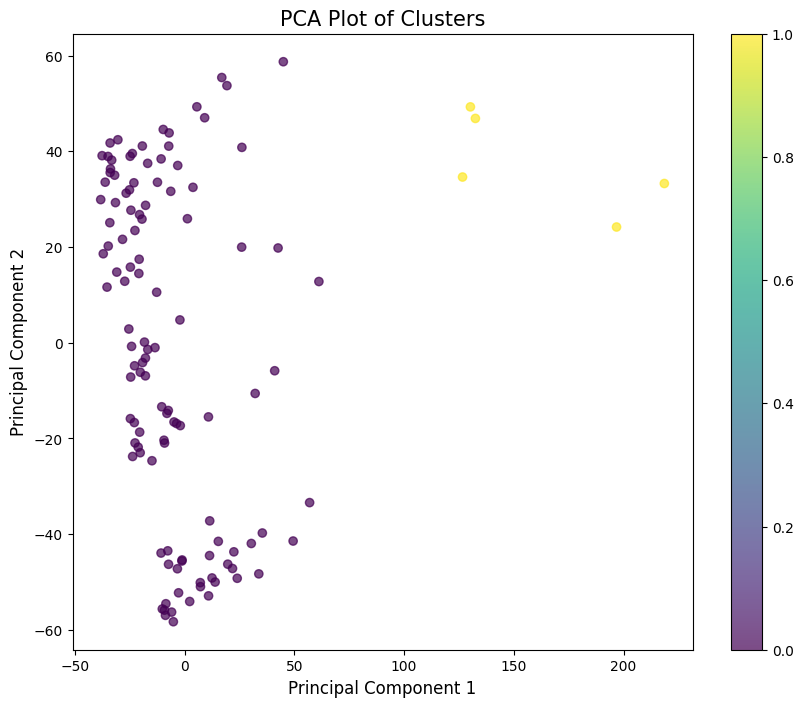

In [19]:
def plot_pca_clusters(data, labels, n_components=2):
    """
    Perform PCA and plot a 2D scatter plot of the data colored by cluster labels.
    
    Parameters:
    - data: 2D array-like, the input data (features) for PCA
    - labels: array-like, the cluster labels for each data point
    - n_components: int, the number of components for PCA (default is 2)
    
    Returns:
    - None, displays the PCA plot.
    """
    # Standardize the data (PCA is sensitive to scale)
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data)
    
    # Create a DataFrame for plotting
    pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_df['Cluster'] = labels
    
    # Create the scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7)
    
    # Add a color bar
    plt.colorbar(scatter)
    
    # Add labels and title
    plt.title('PCA Plot of Clusters', fontsize=15)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    
    # Show plot
    plt.show()

# Plot PCA with the given labeling of clusters
plot_pca_clusters(df_5000, clustering_5000.labels_)

# Step 2e

In [15]:
df_10 = df.iloc[:, :10]
df_100 = df.iloc[:, :100]
df_1000 = df.iloc[:, :1000]
df_10000 = df.iloc[:, :10000]

In [16]:
clustering_10 = AgglomerativeClustering(n_clusters=15).fit(df_10)
clustering_100 = AgglomerativeClustering(n_clusters=15).fit(df_100)
clustering_1000 = AgglomerativeClustering(n_clusters=15).fit(df_1000)
clustering_10000 = AgglomerativeClustering(n_clusters=15).fit(df_10000)

In [9]:
print(clustering_10.labels_)
print(clustering_100.labels_)
print(clustering_1000.labels_)
print(clustering_10000.labels_)

[ 7 14  2  0  2  4  9  2 12 12  2  7  6  5 13  8  5  6  5  1  0  3  1  4
  5  7  1  0 13 10  4 10  0  3  1  5  6  5  8  3  0  8  7  4 11 10  0  0
  8  5  6 11  1 13  0  1 11  4  7 10  3  3  5  4 13 13  1 11  4 11 10  0
  3 10  7  4  7  8  0  3  1  7  4  5 13  8  7  5  1  3  7  6 11 10 13 10
  5  4  5 13  1  9 14  9  2 12  2 11  6  8 13  3 10  9  9  2  0 12  2]
[ 0 13  0  7 11 13  8  0  7  7 11  6  5  2 14  3  6  5  9 12 14  4  3  5
  6  2 12  4 10 11  5  1 14  4  3  6  5  2  1 14  4  3  6  5  2  1  4  4
  1  6  5  2  1  4  4  3  6  5  2  1  4  4  6  5 10 10  3  6  5  2  1  4
  4  3  6  5  2  1 14 10  9  6  5  2  4  3  6  2 12 10  6  5  2  1 14  3
  6  5  2  4  3  8 13  8  0  7 11  6  6  1 14 10  3  8  8  0  7  7 11]
[ 5  1  5 10  8  1 12  6  3  3  7  0  1 11 10  8  0  1  2  9 10  4  8  1
  0 11  9  3  4  8  1  6 10  4  8  0  1 11  6 10  3  7  0  1 12  6  3  3
  6  0  1 12  6  3  3  7  0  1 12  6  3  3  5  1 10  4  8  0  1 12  6  3
  4  7  0  1 11  5 10  4  2  0  5 11  4  8  0 11  9 14 

## Chi Squared

In [30]:
# 10 and 100 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_10.labels_, name='Clustering 10 genes'), pd.Series(clustering_100.labels_, name='Clustering 100 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 778.6980934343433
P-value: 2.0490782872273698e-70
Degrees of Freedom: 196
Expected Frequencies:
[[0.46218487 0.92436975 1.1092437  1.01680672 1.29411765 1.29411765
  1.4789916  0.55462185 0.46218487 0.18487395 0.55462185 0.46218487
  0.27731092 0.27731092 0.64705882]
 [0.42016807 0.84033613 1.00840336 0.92436975 1.17647059 1.17647059
  1.34453782 0.50420168 0.42016807 0.16806723 0.50420168 0.42016807
  0.25210084 0.25210084 0.58823529]
 [0.33613445 0.67226891 0.80672269 0.7394958  0.94117647 0.94117647
  1.07563025 0.40336134 0.33613445 0.13445378 0.40336134 0.33613445
  0.20168067 0.20168067 0.47058824]
 [0.37815126 0.75630252 0.90756303 0.83193277 1.05882353 1.05882353
  1.21008403 0.45378151 0.37815126 0.1512605  0.45378151 0.37815126
  0.22689076 0.22689076 0.52941176]
 [0.42016807 0.84033613 1.00840336 0.92436975 1.17647059 1.17647059
  1.34453782 0.50420168 0.42016807 0.16806723 0.50420168 0.42016807
  0.25210084 0.25210084 0.58823529]
 [0.50420168 1.00840

In [31]:
# 10 and 1000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_10.labels_, name='Clustering 10 genes'), pd.Series(clustering_1000.labels_, name='Clustering 1000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 538.1496053791886
P-value: 1.1209850913969974e-33
Degrees of Freedom: 196
Expected Frequencies:
[[1.57142857 1.4789916  0.18487395 1.29411765 0.7394958  0.46218487
  1.1092437  0.64705882 0.83193277 0.27731092 0.7394958  0.64705882
  0.7394958  0.09243697 0.18487395]
 [1.42857143 1.34453782 0.16806723 1.17647059 0.67226891 0.42016807
  1.00840336 0.58823529 0.75630252 0.25210084 0.67226891 0.58823529
  0.67226891 0.08403361 0.16806723]
 [1.14285714 1.07563025 0.13445378 0.94117647 0.53781513 0.33613445
  0.80672269 0.47058824 0.60504202 0.20168067 0.53781513 0.47058824
  0.53781513 0.06722689 0.13445378]
 [1.28571429 1.21008403 0.1512605  1.05882353 0.60504202 0.37815126
  0.90756303 0.52941176 0.68067227 0.22689076 0.60504202 0.52941176
  0.60504202 0.07563025 0.1512605 ]
 [1.42857143 1.34453782 0.16806723 1.17647059 0.67226891 0.42016807
  1.00840336 0.58823529 0.75630252 0.25210084 0.67226891 0.58823529
  0.67226891 0.08403361 0.16806723]
 [1.71428571 1.61344

In [32]:
# 10 and 5000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_10.labels_, name='Clustering 10 genes'), pd.Series(clustering_5000.labels_, name='Clustering 5000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 438.4014494648869
P-value: 1.354875199953524e-20
Degrees of Freedom: 196
Expected Frequencies:
[[1.4789916  1.4789916  1.38655462 0.46218487 1.38655462 1.1092437
  0.46218487 0.27731092 0.64705882 0.83193277 0.09243697 0.09243697
  0.09243697 0.55462185 0.64705882]
 [1.34453782 1.34453782 1.2605042  0.42016807 1.2605042  1.00840336
  0.42016807 0.25210084 0.58823529 0.75630252 0.08403361 0.08403361
  0.08403361 0.50420168 0.58823529]
 [1.07563025 1.07563025 1.00840336 0.33613445 1.00840336 0.80672269
  0.33613445 0.20168067 0.47058824 0.60504202 0.06722689 0.06722689
  0.06722689 0.40336134 0.47058824]
 [1.21008403 1.21008403 1.13445378 0.37815126 1.13445378 0.90756303
  0.37815126 0.22689076 0.52941176 0.68067227 0.07563025 0.07563025
  0.07563025 0.45378151 0.52941176]
 [1.34453782 1.34453782 1.2605042  0.42016807 1.2605042  1.00840336
  0.42016807 0.25210084 0.58823529 0.75630252 0.08403361 0.08403361
  0.08403361 0.50420168 0.58823529]
 [1.61344538 1.6134453

In [33]:
# 10 and 10000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_10.labels_, name='Clustering 10 genes'), pd.Series(clustering_10000.labels_, name='Clustering 10000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 394.8861768692167
P-value: 1.6436085205371965e-15
Degrees of Freedom: 196
Expected Frequencies:
[[0.27731092 1.4789916  1.20168067 1.38655462 0.92436975 1.4789916
  0.64705882 0.92436975 0.09243697 0.09243697 0.09243697 0.83193277
  0.46218487 0.09243697 1.01680672]
 [0.25210084 1.34453782 1.09243697 1.2605042  0.84033613 1.34453782
  0.58823529 0.84033613 0.08403361 0.08403361 0.08403361 0.75630252
  0.42016807 0.08403361 0.92436975]
 [0.20168067 1.07563025 0.87394958 1.00840336 0.67226891 1.07563025
  0.47058824 0.67226891 0.06722689 0.06722689 0.06722689 0.60504202
  0.33613445 0.06722689 0.7394958 ]
 [0.22689076 1.21008403 0.98319328 1.13445378 0.75630252 1.21008403
  0.52941176 0.75630252 0.07563025 0.07563025 0.07563025 0.68067227
  0.37815126 0.07563025 0.83193277]
 [0.25210084 1.34453782 1.09243697 1.2605042  0.84033613 1.34453782
  0.58823529 0.84033613 0.08403361 0.08403361 0.08403361 0.75630252
  0.42016807 0.08403361 0.92436975]
 [0.30252101 1.613445

In [34]:
# 100 and 1000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_100.labels_, name='Clustering 100 genes'), pd.Series(clustering_1000.labels_, name='Clustering 1000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 972.7918975468975
P-value: 3.2518360554168893e-103
Degrees of Freedom: 196
Expected Frequencies:
[[0.71428571 0.67226891 0.08403361 0.58823529 0.33613445 0.21008403
  0.50420168 0.29411765 0.37815126 0.12605042 0.33613445 0.29411765
  0.33613445 0.04201681 0.08403361]
 [1.42857143 1.34453782 0.16806723 1.17647059 0.67226891 0.42016807
  1.00840336 0.58823529 0.75630252 0.25210084 0.67226891 0.58823529
  0.67226891 0.08403361 0.16806723]
 [1.71428571 1.61344538 0.20168067 1.41176471 0.80672269 0.50420168
  1.21008403 0.70588235 0.90756303 0.30252101 0.80672269 0.70588235
  0.80672269 0.10084034 0.20168067]
 [1.57142857 1.4789916  0.18487395 1.29411765 0.7394958  0.46218487
  1.1092437  0.64705882 0.83193277 0.27731092 0.7394958  0.64705882
  0.7394958  0.09243697 0.18487395]
 [2.         1.88235294 0.23529412 1.64705882 0.94117647 0.58823529
  1.41176471 0.82352941 1.05882353 0.35294118 0.94117647 0.82352941
  0.94117647 0.11764706 0.23529412]
 [2.         1.8823

In [35]:
# 100 and 5000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_100.labels_, name='Clustering 100 genes'), pd.Series(clustering_5000.labels_, name='Clustering 5000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 818.1914944083694
P-value: 6.500728522879178e-77
Degrees of Freedom: 196
Expected Frequencies:
[[0.67226891 0.67226891 0.6302521  0.21008403 0.6302521  0.50420168
  0.21008403 0.12605042 0.29411765 0.37815126 0.04201681 0.04201681
  0.04201681 0.25210084 0.29411765]
 [1.34453782 1.34453782 1.2605042  0.42016807 1.2605042  1.00840336
  0.42016807 0.25210084 0.58823529 0.75630252 0.08403361 0.08403361
  0.08403361 0.50420168 0.58823529]
 [1.61344538 1.61344538 1.51260504 0.50420168 1.51260504 1.21008403
  0.50420168 0.30252101 0.70588235 0.90756303 0.10084034 0.10084034
  0.10084034 0.60504202 0.70588235]
 [1.4789916  1.4789916  1.38655462 0.46218487 1.38655462 1.1092437
  0.46218487 0.27731092 0.64705882 0.83193277 0.09243697 0.09243697
  0.09243697 0.55462185 0.64705882]
 [1.88235294 1.88235294 1.76470588 0.58823529 1.76470588 1.41176471
  0.58823529 0.35294118 0.82352941 1.05882353 0.11764706 0.11764706
  0.11764706 0.70588235 0.82352941]
 [1.88235294 1.8823529

In [36]:
# 100 and 10000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_100.labels_, name='Clustering 10 genes'), pd.Series(clustering_10000.labels_, name='Clustering 10000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 722.3989920322733
P-value: 2.435566347491921e-61
Degrees of Freedom: 196
Expected Frequencies:
[[0.12605042 0.67226891 0.54621849 0.6302521  0.42016807 0.67226891
  0.29411765 0.42016807 0.04201681 0.04201681 0.04201681 0.37815126
  0.21008403 0.04201681 0.46218487]
 [0.25210084 1.34453782 1.09243697 1.2605042  0.84033613 1.34453782
  0.58823529 0.84033613 0.08403361 0.08403361 0.08403361 0.75630252
  0.42016807 0.08403361 0.92436975]
 [0.30252101 1.61344538 1.31092437 1.51260504 1.00840336 1.61344538
  0.70588235 1.00840336 0.10084034 0.10084034 0.10084034 0.90756303
  0.50420168 0.10084034 1.1092437 ]
 [0.27731092 1.4789916  1.20168067 1.38655462 0.92436975 1.4789916
  0.64705882 0.92436975 0.09243697 0.09243697 0.09243697 0.83193277
  0.46218487 0.09243697 1.01680672]
 [0.35294118 1.88235294 1.52941176 1.76470588 1.17647059 1.88235294
  0.82352941 1.17647059 0.11764706 0.11764706 0.11764706 1.05882353
  0.58823529 0.11764706 1.29411765]
 [0.35294118 1.8823529

In [37]:
# 1000 and 5000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_1000.labels_, name='Clustering 1000 genes'), pd.Series(clustering_5000.labels_, name='Clustering 5000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 1184.1947916666668
P-value: 7.445485226589463e-141
Degrees of Freedom: 196
Expected Frequencies:
[[2.28571429 2.28571429 2.14285714 0.71428571 2.14285714 1.71428571
  0.71428571 0.42857143 1.         1.28571429 0.14285714 0.14285714
  0.14285714 0.85714286 1.        ]
 [2.1512605  2.1512605  2.01680672 0.67226891 2.01680672 1.61344538
  0.67226891 0.40336134 0.94117647 1.21008403 0.13445378 0.13445378
  0.13445378 0.80672269 0.94117647]
 [0.26890756 0.26890756 0.25210084 0.08403361 0.25210084 0.20168067
  0.08403361 0.05042017 0.11764706 0.1512605  0.01680672 0.01680672
  0.01680672 0.10084034 0.11764706]
 [1.88235294 1.88235294 1.76470588 0.58823529 1.76470588 1.41176471
  0.58823529 0.35294118 0.82352941 1.05882353 0.11764706 0.11764706
  0.11764706 0.70588235 0.82352941]
 [1.07563025 1.07563025 1.00840336 0.33613445 1.00840336 0.80672269
  0.33613445 0.20168067 0.47058824 0.60504202 0.06722689 0.06722689
  0.06722689 0.40336134 0.47058824]
 [0.67226891 0.6722

In [38]:
# 1000 and 10000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_1000.labels_, name='Clustering 1000 genes'), pd.Series(clustering_10000.labels_, name='Clustering 10000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 1128.2169871794872
P-value: 9.807999895345092e-131
Degrees of Freedom: 196
Expected Frequencies:
[[0.42857143 2.28571429 1.85714286 2.14285714 1.42857143 2.28571429
  1.         1.42857143 0.14285714 0.14285714 0.14285714 1.28571429
  0.71428571 0.14285714 1.57142857]
 [0.40336134 2.1512605  1.74789916 2.01680672 1.34453782 2.1512605
  0.94117647 1.34453782 0.13445378 0.13445378 0.13445378 1.21008403
  0.67226891 0.13445378 1.4789916 ]
 [0.05042017 0.26890756 0.21848739 0.25210084 0.16806723 0.26890756
  0.11764706 0.16806723 0.01680672 0.01680672 0.01680672 0.1512605
  0.08403361 0.01680672 0.18487395]
 [0.35294118 1.88235294 1.52941176 1.76470588 1.17647059 1.88235294
  0.82352941 1.17647059 0.11764706 0.11764706 0.11764706 1.05882353
  0.58823529 0.11764706 1.29411765]
 [0.20168067 1.07563025 0.87394958 1.00840336 0.67226891 1.07563025
  0.47058824 0.67226891 0.06722689 0.06722689 0.06722689 0.60504202
  0.33613445 0.06722689 0.7394958 ]
 [0.12605042 0.672268

In [39]:
# 5000 and 10000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_5000.labels_, name='Clustering 5000 genes'), pd.Series(clustering_10000.labels_, name='Clustering 10000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 1334.617419871795
P-value: 1.7224790362479042e-168
Degrees of Freedom: 196
Expected Frequencies:
[[0.40336134 2.1512605  1.74789916 2.01680672 1.34453782 2.1512605
  0.94117647 1.34453782 0.13445378 0.13445378 0.13445378 1.21008403
  0.67226891 0.13445378 1.4789916 ]
 [0.40336134 2.1512605  1.74789916 2.01680672 1.34453782 2.1512605
  0.94117647 1.34453782 0.13445378 0.13445378 0.13445378 1.21008403
  0.67226891 0.13445378 1.4789916 ]
 [0.37815126 2.01680672 1.63865546 1.8907563  1.2605042  2.01680672
  0.88235294 1.2605042  0.12605042 0.12605042 0.12605042 1.13445378
  0.6302521  0.12605042 1.38655462]
 [0.12605042 0.67226891 0.54621849 0.6302521  0.42016807 0.67226891
  0.29411765 0.42016807 0.04201681 0.04201681 0.04201681 0.37815126
  0.21008403 0.04201681 0.46218487]
 [0.37815126 2.01680672 1.63865546 1.8907563  1.2605042  2.01680672
  0.88235294 1.2605042  0.12605042 0.12605042 0.12605042 1.13445378
  0.6302521  0.12605042 1.38655462]
 [0.30252101 1.613445

In [19]:
#Modification of Labels for use in Sankey Diagram

labeling1 = clustering_10.labels_
labeling2 = clustering_100.labels_
labeling3 = clustering_1000.labels_
labeling4 = clustering_5000.labels_
labeling5 = clustering_10000.labels_

In [20]:
new_arr = []
for i in range(len(labeling1)):
    new_arr.append('A' + str(labeling1[i]))
labeling1 = new_arr
new_arr = []
for i in range(len(labeling2)):
    new_arr.append('B' + str(labeling2[i]))
labeling2 = new_arr
new_arr = []
for i in range(len(labeling3)):
    new_arr.append('C' + str(labeling3[i]))
labeling3 = new_arr
new_arr = []
for i in range(len(labeling4)):
    new_arr.append('D' + str(labeling4[i]))
labeling4 = new_arr
new_arr = []
for i in range(len(labeling5)):
    new_arr.append('E' + str(labeling5[i]))
labeling5 = new_arr

In [23]:
def calculate_flow_multiple(labelings):
    """
    Calculate the flow (transition counts) between multiple labelings.
    
    Parameters:
    - labelings: list of array-like objects, where each array represents the categories for each labeling stage
    
    Returns:
    - flows: A list of flow tables (contingency tables) between consecutive labelings.
    """
    flows = []
    for i in range(len(labelings) - 1):
        flow_table = pd.crosstab(pd.Series(labelings[i], name=f'Labeling {i+1}'), 
                                 pd.Series(labelings[i+1], name=f'Labeling {i+2}'))
        flows.append(flow_table)
    return flows

def create_sankey_from_multiple_flows(flow_tables):
    """
    Create a Sankey diagram from multiple flow tables (transitions between consecutive labelings).
    
    Parameters:
    - flow_tables: list of pd.DataFrames, each representing a contingency table with the flow between consecutive labelings
    
    Returns:
    - fig: Plotly figure object displaying the Sankey diagram.
    """
    all_labels = []
    sources = []
    targets = []
    values = []
    
    label_offset = 0
    
    # Process each flow table (transition between consecutive labelings)
    for i, flow_table in enumerate(flow_tables):
        labels_1 = list(flow_table.index)   # Categories from the first labeling in the pair
        labels_2 = list(flow_table.columns)  # Categories from the second labeling in the pair
        
        # Add new labels to the combined label list (without duplicates)
        all_labels += [label for label in labels_1 if label not in all_labels]
        all_labels += [label for label in labels_2 if label not in all_labels]

        # Create the source, target, and value lists for the Sankey diagram
        for j, label_1 in enumerate(labels_1):
            for k, label_2 in enumerate(labels_2):
                flow_value = flow_table.loc[label_1, label_2]
                if flow_value > 0:
                    sources.append(all_labels.index(label_1))  # Source index
                    targets.append(all_labels.index(label_2))  # Target index
                    values.append(flow_value)

        label_offset += len(labels_1)  # Update the offset for the next labeling stage
    
    # Create the Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_labels  # All unique labels across all labelings
        ),
        link=dict(
            source=sources,  # Source nodes (indices in the label list)
            target=targets,  # Target nodes (indices in the label list)
            value=values     # Values (flow quantities between nodes)
        )
    ))

    # Update the layout and return the figure
    fig.update_layout(title_text="Sankey Diagram of Multiple Labelings", font_size=10)
    return fig


# Step 1: Calculate the flow tables for multiple labelings
labelings = [labeling1, labeling2, labeling3, labeling4, labeling5]
flow_tables = calculate_flow_multiple(labelings)

# Step 2: Create the Sankey diagram
fig = create_sankey_from_multiple_flows(flow_tables)

# Step 3: Display the diagram
fig.show()

# Retrying Step 2 with Smaller number of Clusters (5)

In [38]:
clustering_10 = AgglomerativeClustering(n_clusters=5).fit(df_10)
clustering_100 = AgglomerativeClustering(n_clusters=5).fit(df_100)
clustering_1000 = AgglomerativeClustering(n_clusters=5).fit(df_1000)
clustering_5000 = AgglomerativeClustering(n_clusters=5).fit(df_5000)
clustering_10000 = AgglomerativeClustering(n_clusters=5).fit(df_10000)

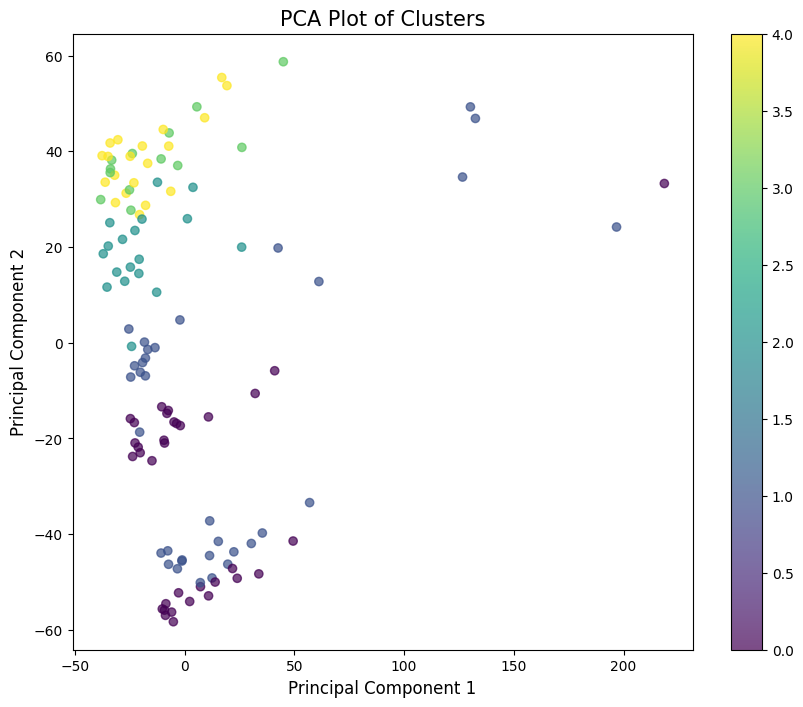

In [39]:
plot_pca_clusters(df_5000, clustering_10.labels_)

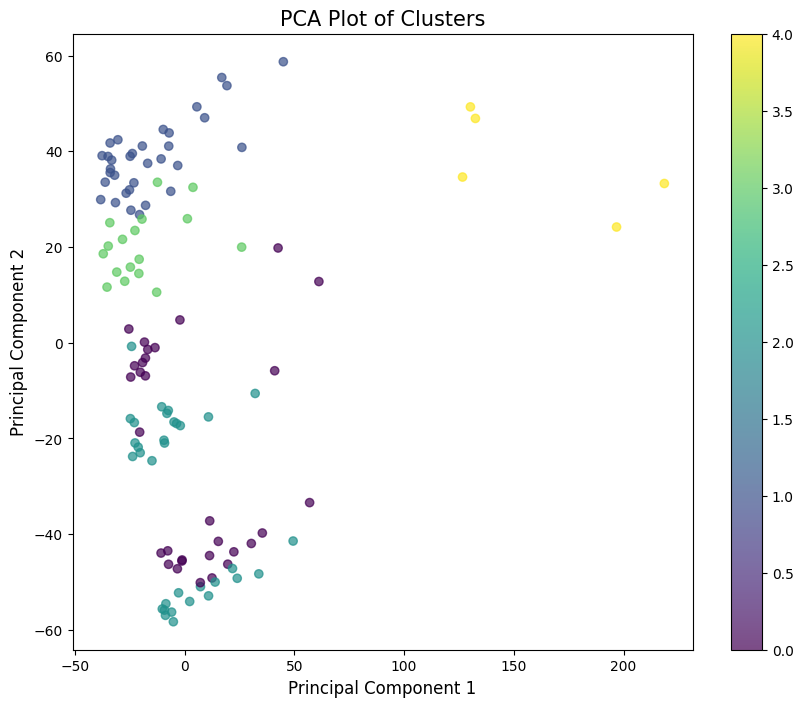

In [40]:
plot_pca_clusters(df_5000, clustering_100.labels_)

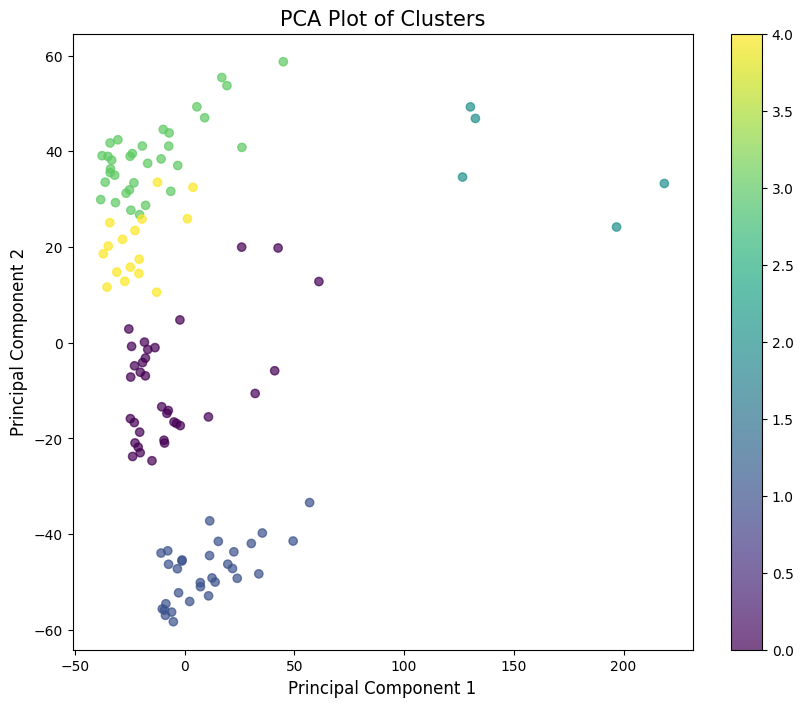

In [41]:
plot_pca_clusters(df_5000, clustering_1000.labels_)

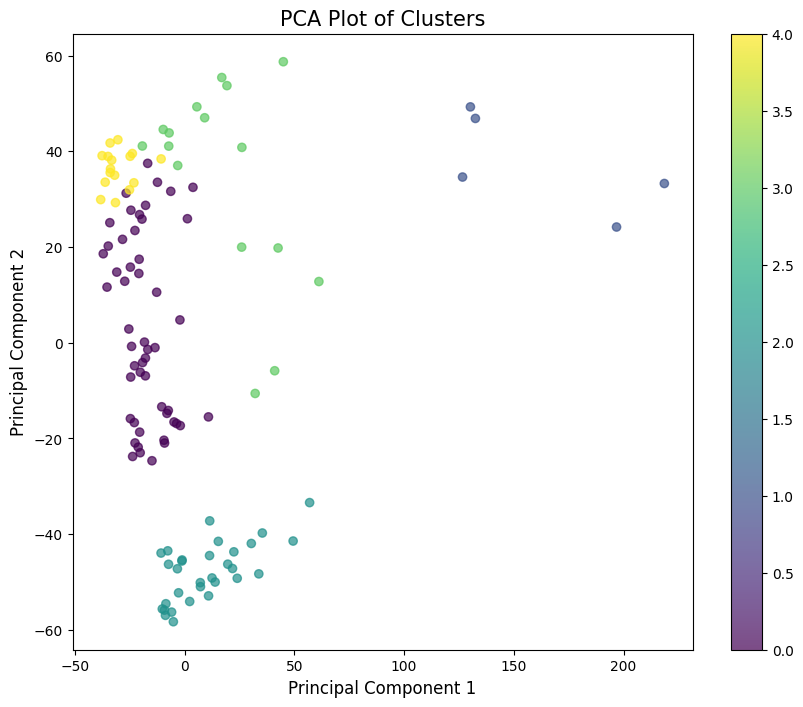

In [42]:
plot_pca_clusters(df_5000, clustering_5000.labels_)

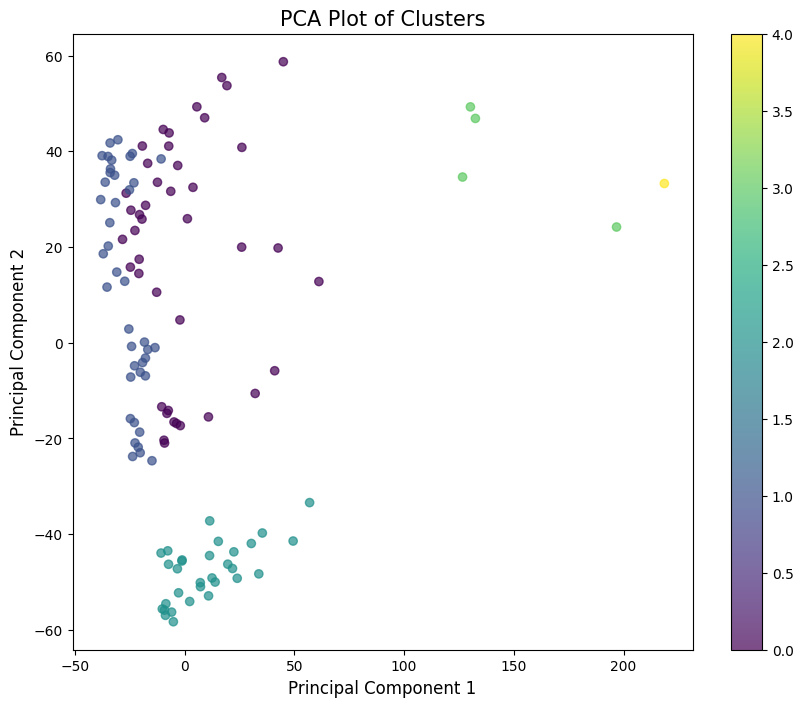

In [43]:
plot_pca_clusters(df_5000, clustering_10000.labels_)

In [44]:
# 10 and 100 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_10.labels_, name='Clustering 10 genes'), pd.Series(clustering_100.labels_, name='Clustering 100 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 334.82109264689905
P-value: 1.5031625664556256e-61
Degrees of Freedom: 16
Expected Frequencies:
[[8.85714286 9.42857143 9.42857143 4.85714286 1.42857143]
 [8.85714286 9.42857143 9.42857143 4.85714286 1.42857143]
 [4.68907563 4.99159664 4.99159664 2.57142857 0.75630252]
 [3.38655462 3.60504202 3.60504202 1.85714286 0.54621849]
 [5.21008403 5.54621849 5.54621849 2.85714286 0.84033613]]
Observed Frequencies
Clustering 100 genes   0   1   2   3  4
Clustering 10 genes                    
0                      1   0  32   0  1
1                     30   0   0   0  4
2                      0   0   1  17  0
3                      0  13   0   0  0
4                      0  20   0   0  0


In [45]:
# 10 and 1000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_10.labels_, name='Clustering 10 genes'), pd.Series(clustering_1000.labels_, name='Clustering 1000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 226.29141893316464
P-value: 3.64711939919799e-39
Degrees of Freedom: 16
Expected Frequencies:
[[9.71428571 8.85714286 1.42857143 9.42857143 4.57142857]
 [9.71428571 8.85714286 1.42857143 9.42857143 4.57142857]
 [5.14285714 4.68907563 0.75630252 4.99159664 2.42016807]
 [3.71428571 3.38655462 0.54621849 3.60504202 1.74789916]
 [5.71428571 5.21008403 0.84033613 5.54621849 2.68907563]]
Observed Frequencies
Clustering 1000 genes   0   1  2   3   4
Clustering 10 genes                     
0                      18  15  1   0   0
1                      14  16  4   0   0
2                       2   0  0   0  16
3                       0   0  0  13   0
4                       0   0  0  20   0


In [46]:
# 10 and 5000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_10.labels_, name='Clustering 10 genes'), pd.Series(clustering_5000.labels_, name='Clustering 5000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 103.22565672015979
P-value: 8.581290629436844e-15
Degrees of Freedom: 16
Expected Frequencies:
[[14.57142857  1.42857143  8.85714286  4.57142857  4.57142857]
 [14.57142857  1.42857143  8.85714286  4.57142857  4.57142857]
 [ 7.71428571  0.75630252  4.68907563  2.42016807  2.42016807]
 [ 5.57142857  0.54621849  3.38655462  1.74789916  1.74789916]
 [ 8.57142857  0.84033613  5.21008403  2.68907563  2.68907563]]
Observed Frequencies
Clustering 5000 genes   0  1   2  3  4
Clustering 10 genes                   
0                      16  1  15  2  0
1                      12  4  16  2  0
2                      17  0   0  1  0
3                       1  0   0  5  7
4                       5  0   0  6  9


In [47]:
# 10 and 10000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_10.labels_, name='Clustering 10 genes'), pd.Series(clustering_10000.labels_, name='Clustering 10000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 52.782021413473025
P-value: 8.18547332763238e-06
Degrees of Freedom: 16
Expected Frequencies:
[[12.         11.71428571  8.85714286  1.14285714  0.28571429]
 [12.         11.71428571  8.85714286  1.14285714  0.28571429]
 [ 6.35294118  6.20168067  4.68907563  0.60504202  0.1512605 ]
 [ 4.58823529  4.4789916   3.38655462  0.43697479  0.1092437 ]
 [ 7.05882353  6.8907563   5.21008403  0.67226891  0.16806723]]
Observed Frequencies
Clustering 10000 genes   0   1   2  3  4
Clustering 10 genes                     
0                       11   7  15  0  1
1                        3  11  16  4  0
2                       11   7   0  0  0
3                        6   7   0  0  0
4                       11   9   0  0  0


In [48]:
# 100 and 1000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_100.labels_, name='Clustering 100 genes'), pd.Series(clustering_1000.labels_, name='Clustering 1000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 348.8460772257063
P-value: 1.801004192680366e-64
Degrees of Freedom: 16
Expected Frequencies:
[[8.85714286 8.07563025 1.30252101 8.59663866 4.16806723]
 [9.42857143 8.59663866 1.38655462 9.1512605  4.43697479]
 [9.42857143 8.59663866 1.38655462 9.1512605  4.43697479]
 [4.85714286 4.42857143 0.71428571 4.71428571 2.28571429]
 [1.42857143 1.30252101 0.21008403 1.38655462 0.67226891]]
Observed Frequencies
Clustering 1000 genes   0   1  2   3   4
Clustering 100 genes                    
0                      15  16  0   0   0
1                       0   0  0  33   0
2                      18  15  0   0   0
3                       1   0  0   0  16
4                       0   0  5   0   0


In [49]:
# 100 and 5000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_100.labels_, name='Clustering 100 genes'), pd.Series(clustering_5000.labels_, name='Clustering 5000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 214.61905127358546
P-value: 8.651727937336245e-37
Degrees of Freedom: 16
Expected Frequencies:
[[13.28571429  1.30252101  8.07563025  4.16806723  4.16806723]
 [14.14285714  1.38655462  8.59663866  4.43697479  4.43697479]
 [14.14285714  1.38655462  8.59663866  4.43697479  4.43697479]
 [ 7.28571429  0.71428571  4.42857143  2.28571429  2.28571429]
 [ 2.14285714  0.21008403  1.30252101  0.67226891  0.67226891]]
Observed Frequencies
Clustering 5000 genes   0  1   2   3   4
Clustering 100 genes                    
0                      12  0  16   3   0
1                       6  0   0  11  16
2                      17  0  15   1   0
3                      16  0   0   1   0
4                       0  5   0   0   0


In [50]:
# 100 and 10000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_100.labels_, name='Clustering 10 genes'), pd.Series(clustering_10000.labels_, name='Clustering 10000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 158.52143449161292
P-value: 1.6146339630069173e-25
Degrees of Freedom: 16
Expected Frequencies:
[[10.94117647 10.68067227  8.07563025  1.04201681  0.2605042 ]
 [11.64705882 11.3697479   8.59663866  1.1092437   0.27731092]
 [11.64705882 11.3697479   8.59663866  1.1092437   0.27731092]
 [ 6.          5.85714286  4.42857143  0.57142857  0.14285714]
 [ 1.76470588  1.72268908  1.30252101  0.16806723  0.04201681]]
Observed Frequencies
Clustering 10000 genes   0   1   2  3  4
Clustering 10 genes                     
0                        4  11  16  0  0
1                       17  16   0  0  0
2                       10   8  15  0  0
3                       11   6   0  0  0
4                        0   0   0  4  1


In [51]:
# 1000 and 5000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_1000.labels_, name='Clustering 1000 genes'), pd.Series(clustering_5000.labels_, name='Clustering 5000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 307.0310271836007
P-value: 8.908897432458551e-56
Degrees of Freedom: 16
Expected Frequencies:
[[14.57142857  1.42857143  8.85714286  4.57142857  4.57142857]
 [13.28571429  1.30252101  8.07563025  4.16806723  4.16806723]
 [ 2.14285714  0.21008403  1.30252101  0.67226891  0.67226891]
 [14.14285714  1.38655462  8.59663866  4.43697479  4.43697479]
 [ 6.85714286  0.67226891  4.16806723  2.1512605   2.1512605 ]]
Observed Frequencies
Clustering 5000 genes   0  1   2   3   4
Clustering 1000 genes                   
0                      29  0   0   5   0
1                       0  0  31   0   0
2                       0  5   0   0   0
3                       6  0   0  11  16
4                      16  0   0   0   0


In [52]:
# 1000 and 10000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_1000.labels_, name='Clustering 1000 genes'), pd.Series(clustering_10000.labels_, name='Clustering 10000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 240.13491623552596
P-value: 5.429582750192225e-42
Degrees of Freedom: 16
Expected Frequencies:
[[12.         11.71428571  8.85714286  1.14285714  0.28571429]
 [10.94117647 10.68067227  8.07563025  1.04201681  0.2605042 ]
 [ 1.76470588  1.72268908  1.30252101  0.16806723  0.04201681]
 [11.64705882 11.3697479   8.59663866  1.1092437   0.27731092]
 [ 5.64705882  5.51260504  4.16806723  0.53781513  0.13445378]]
Observed Frequencies
Clustering 10000 genes   0   1   2  3  4
Clustering 1000 genes                   
0                       15  19   0  0  0
1                        0   0  31  0  0
2                        0   0   0  4  1
3                       17  16   0  0  0
4                       10   6   0  0  0


In [53]:
# 5000 and 10000 Chi_squared
contingency_table = pd.crosstab(pd.Series(clustering_5000.labels_, name='Clustering 5000 genes'), pd.Series(clustering_10000.labels_, name='Clustering 10000 genes'))
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print('Observed Frequencies')
print(contingency_table)


Chi-squared Statistic: 283.89701897018966
P-value: 5.455434159794967e-51
Degrees of Freedom: 16
Expected Frequencies:
[[18.         17.57142857 13.28571429  1.71428571  0.42857143]
 [ 1.76470588  1.72268908  1.30252101  0.16806723  0.04201681]
 [10.94117647 10.68067227  8.07563025  1.04201681  0.2605042 ]
 [ 5.64705882  5.51260504  4.16806723  0.53781513  0.13445378]
 [ 5.64705882  5.51260504  4.16806723  0.53781513  0.13445378]]
Observed Frequencies
Clustering 10000 genes   0   1   2  3  4
Clustering 5000 genes                   
0                       26  25   0  0  0
1                        0   0   0  4  1
2                        0   0  31  0  0
3                       16   0   0  0  0
4                        0  16   0  0  0


In [54]:
#Modification of Labels for use in Sankey Diagram

labeling1 = clustering_10.labels_
labeling2 = clustering_100.labels_
labeling3 = clustering_1000.labels_
labeling4 = clustering_5000.labels_
labeling5 = clustering_10000.labels_

In [55]:
new_arr = []
for i in range(len(labeling1)):
    new_arr.append('A' + str(labeling1[i]))
labeling1 = new_arr
new_arr = []
for i in range(len(labeling2)):
    new_arr.append('B' + str(labeling2[i]))
labeling2 = new_arr
new_arr = []
for i in range(len(labeling3)):
    new_arr.append('C' + str(labeling3[i]))
labeling3 = new_arr
new_arr = []
for i in range(len(labeling4)):
    new_arr.append('D' + str(labeling4[i]))
labeling4 = new_arr
new_arr = []
for i in range(len(labeling5)):
    new_arr.append('E' + str(labeling5[i]))
labeling5 = new_arr

In [56]:
def calculate_flow_multiple(labelings):
    """
    Calculate the flow (transition counts) between multiple labelings.
    
    Parameters:
    - labelings: list of array-like objects, where each array represents the categories for each labeling stage
    
    Returns:
    - flows: A list of flow tables (contingency tables) between consecutive labelings.
    """
    flows = []
    for i in range(len(labelings) - 1):
        flow_table = pd.crosstab(pd.Series(labelings[i], name=f'Labeling {i+1}'), 
                                 pd.Series(labelings[i+1], name=f'Labeling {i+2}'))
        flows.append(flow_table)
    return flows

def create_sankey_from_multiple_flows(flow_tables):
    """
    Create a Sankey diagram from multiple flow tables (transitions between consecutive labelings).
    
    Parameters:
    - flow_tables: list of pd.DataFrames, each representing a contingency table with the flow between consecutive labelings
    
    Returns:
    - fig: Plotly figure object displaying the Sankey diagram.
    """
    all_labels = []
    sources = []
    targets = []
    values = []
    
    label_offset = 0
    
    # Process each flow table (transition between consecutive labelings)
    for i, flow_table in enumerate(flow_tables):
        labels_1 = list(flow_table.index)   # Categories from the first labeling in the pair
        labels_2 = list(flow_table.columns)  # Categories from the second labeling in the pair
        
        # Add new labels to the combined label list (without duplicates)
        all_labels += [label for label in labels_1 if label not in all_labels]
        all_labels += [label for label in labels_2 if label not in all_labels]

        # Create the source, target, and value lists for the Sankey diagram
        for j, label_1 in enumerate(labels_1):
            for k, label_2 in enumerate(labels_2):
                flow_value = flow_table.loc[label_1, label_2]
                if flow_value > 0:
                    sources.append(all_labels.index(label_1))  # Source index
                    targets.append(all_labels.index(label_2))  # Target index
                    values.append(flow_value)

        label_offset += len(labels_1)  # Update the offset for the next labeling stage
    
    # Create the Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_labels  # All unique labels across all labelings
        ),
        link=dict(
            source=sources,  # Source nodes (indices in the label list)
            target=targets,  # Target nodes (indices in the label list)
            value=values     # Values (flow quantities between nodes)
        )
    ))

    # Update the layout and return the figure
    fig.update_layout(title_text="Sankey Diagram of Multiple Labelings", font_size=10)
    return fig


# Step 1: Calculate the flow tables for multiple labelings
labelings = [labeling1, labeling2, labeling3, labeling4, labeling5]
flow_tables = calculate_flow_multiple(labelings)

# Step 2: Create the Sankey diagram
fig = create_sankey_from_multiple_flows(flow_tables)

# Step 3: Display the diagram
fig.show()

# Compilation of Others' Code

## Kirill's K-Medoids Partitioning around Medoids

In [59]:

from pyclustering.cluster.kmedoids import kmedoids

In [64]:
df_5000_numpy = df_5000.to_numpy()
k = 3
initial_medoids = np.random.choice(len(df_5000_numpy), k, replace=False)
pam_instance = kmedoids(df_5000_numpy, initial_medoids)
pam_instance.process()
clusters = pam_instance.get_clusters()

# Converting pyclustering labels into labeling system that other libraries use
kmedoids_labels = np.zeros(len(df_5000_numpy)).astype(int)
for i in range(len(clusters)):
    kmedoids_labels[clusters[i]] = int(i)

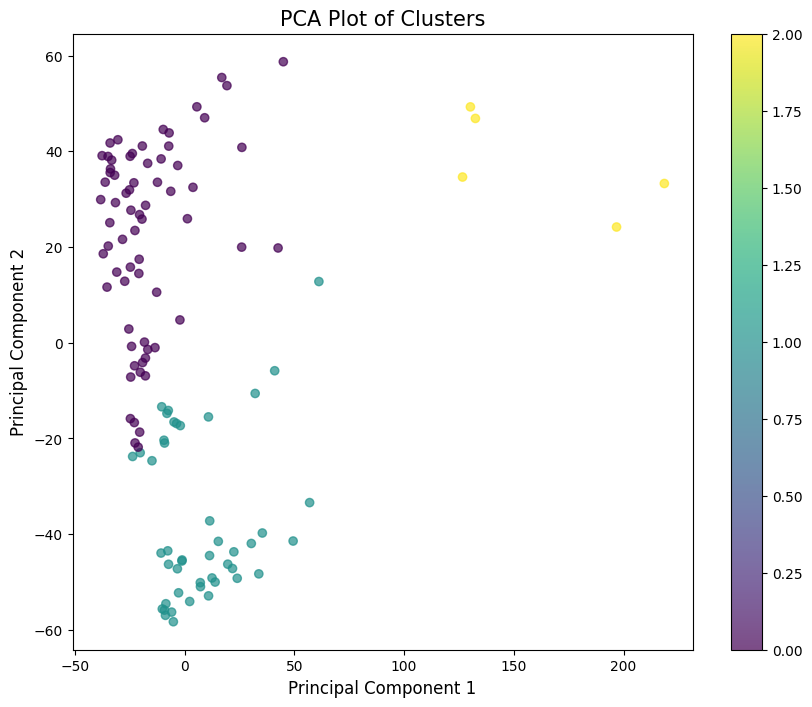

In [70]:
plot_pca_clusters(df_5000, kmedoids_labels)

## Veronica's Spectral Clustering

In [66]:
from sklearn.cluster import SpectralClustering

In [67]:
spectral_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)

# Fit the spectral clustering model and predict cluster labels
spectral_labels = spectral_clustering.fit_predict(df_5000_numpy)

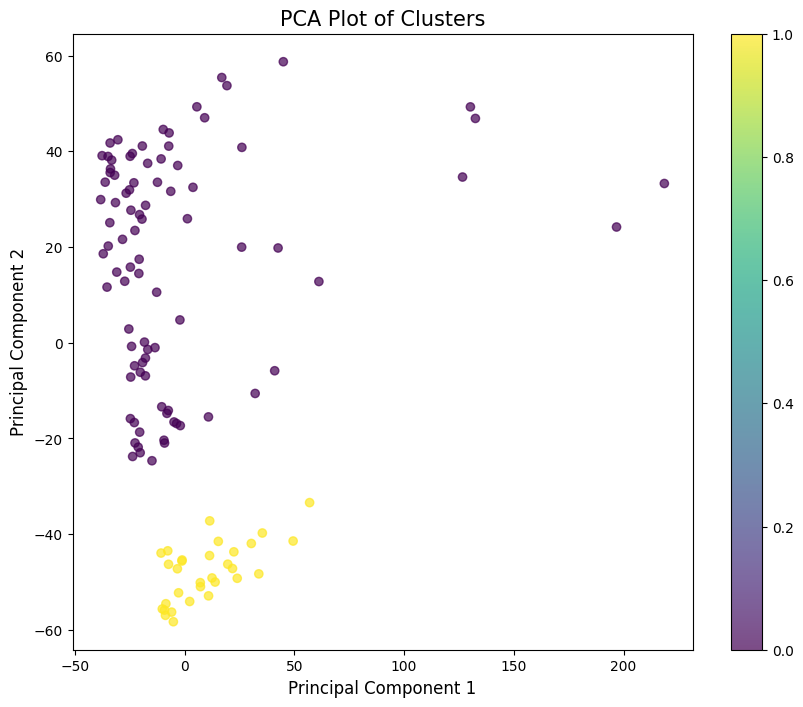

In [69]:
plot_pca_clusters(df_5000, spectral_labels)

## Marielle's KMeans

In [71]:
from sklearn.cluster import KMeans

In [72]:
kmeans = KMeans(n_clusters = 5, random_state=42)
kmeans.fit(df_5000_numpy)
kmeans_labels = kmeans.labels_

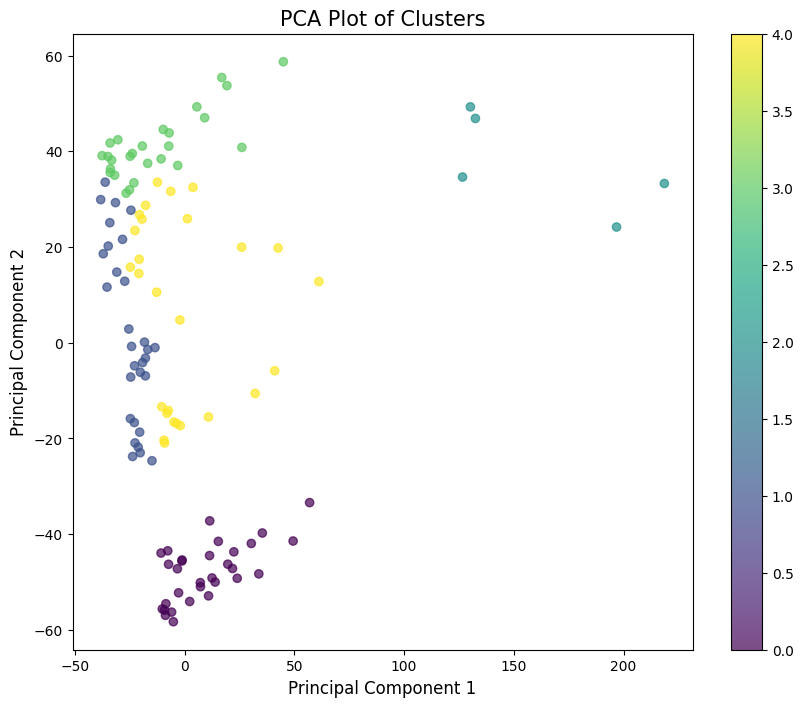

In [73]:
plot_pca_clusters(df_5000, kmeans_labels)

## Emily's Gaussian Mixture Modelling

In [74]:
from sklearn.mixture import GaussianMixture

In [75]:
gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=100, random_state=0)
gmm.fit(df_5000_numpy)
gmm_labels = gmm.predict(df_5000_numpy)

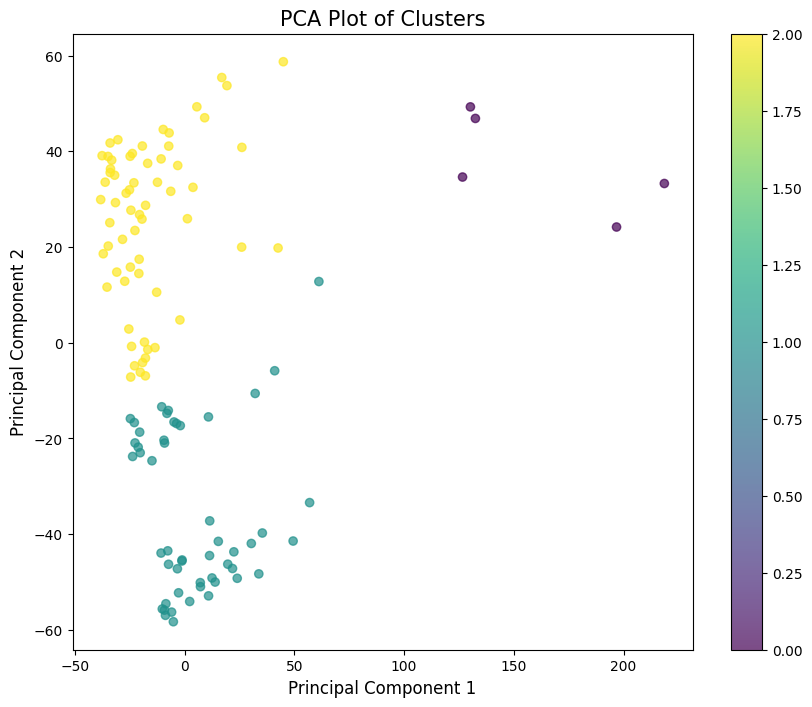

In [76]:
plot_pca_clusters(df_5000, gmm_labels)

# Sample Heat Map

## Compilation of Results into One Labelling Dataframe for Heatmap

In [77]:
lut = {'healthy': 'green', 'ra non treatment': 'purple'}
row_colors = df['Group'].map(lut)

In [94]:
row_color_df = pd.DataFrame(row_colors)

In [95]:
row_color_df['Hierarchical Clustering'] = clustering_5000.labels_
row_color_df['KMedoids Clustering'] = kmedoids_labels
row_color_df['Spectral Clustering'] = spectral_labels
row_color_df['KMeans Clustering'] = kmeans_labels
row_color_df['GMM Clustering'] = gmm_labels

In [96]:
row_color_df

,Group,Hierarchical Clustering,KMedoids Clustering,Spectral Clustering,KMeans Clustering,GMM Clustering
refinebio_accession_code,,,,,,
SRR7725764,green,3,1,0,4,1
SRR7725765,green,0,0,0,4,2
SRR7725767,green,3,1,0,4,1
SRR7725768,green,0,0,0,3,2
SRR7725770,green,2,1,1,0,1
...,...,...,...,...,...,...
SRR7726017,purple,2,1,1,0,1
SRR7726018,purple,0,0,0,1,2
SRR7726019,purple,4,0,0,1,2


In [97]:
lut2 = {0: 'red', 1: 'orange', 2: 'green', 3: 'blue', 4: 'purple'}
row_color_df['Hierarchical Clustering'] = row_color_df['Hierarchical Clustering'].map(lut2)
row_color_df['KMedoids Clustering'] = row_color_df['KMedoids Clustering'].map(lut2)
row_color_df['Spectral Clustering'] = row_color_df['Spectral Clustering'].map(lut2)
row_color_df['KMeans Clustering'] = row_color_df['KMeans Clustering'].map(lut2)
row_color_df['GMM Clustering'] = row_color_df['GMM Clustering'].map(lut2)


In [106]:
df.columns.name = 'Gene'
df.index.name = 'Sample'

C:\Users\13523\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

C:\Users\13523\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



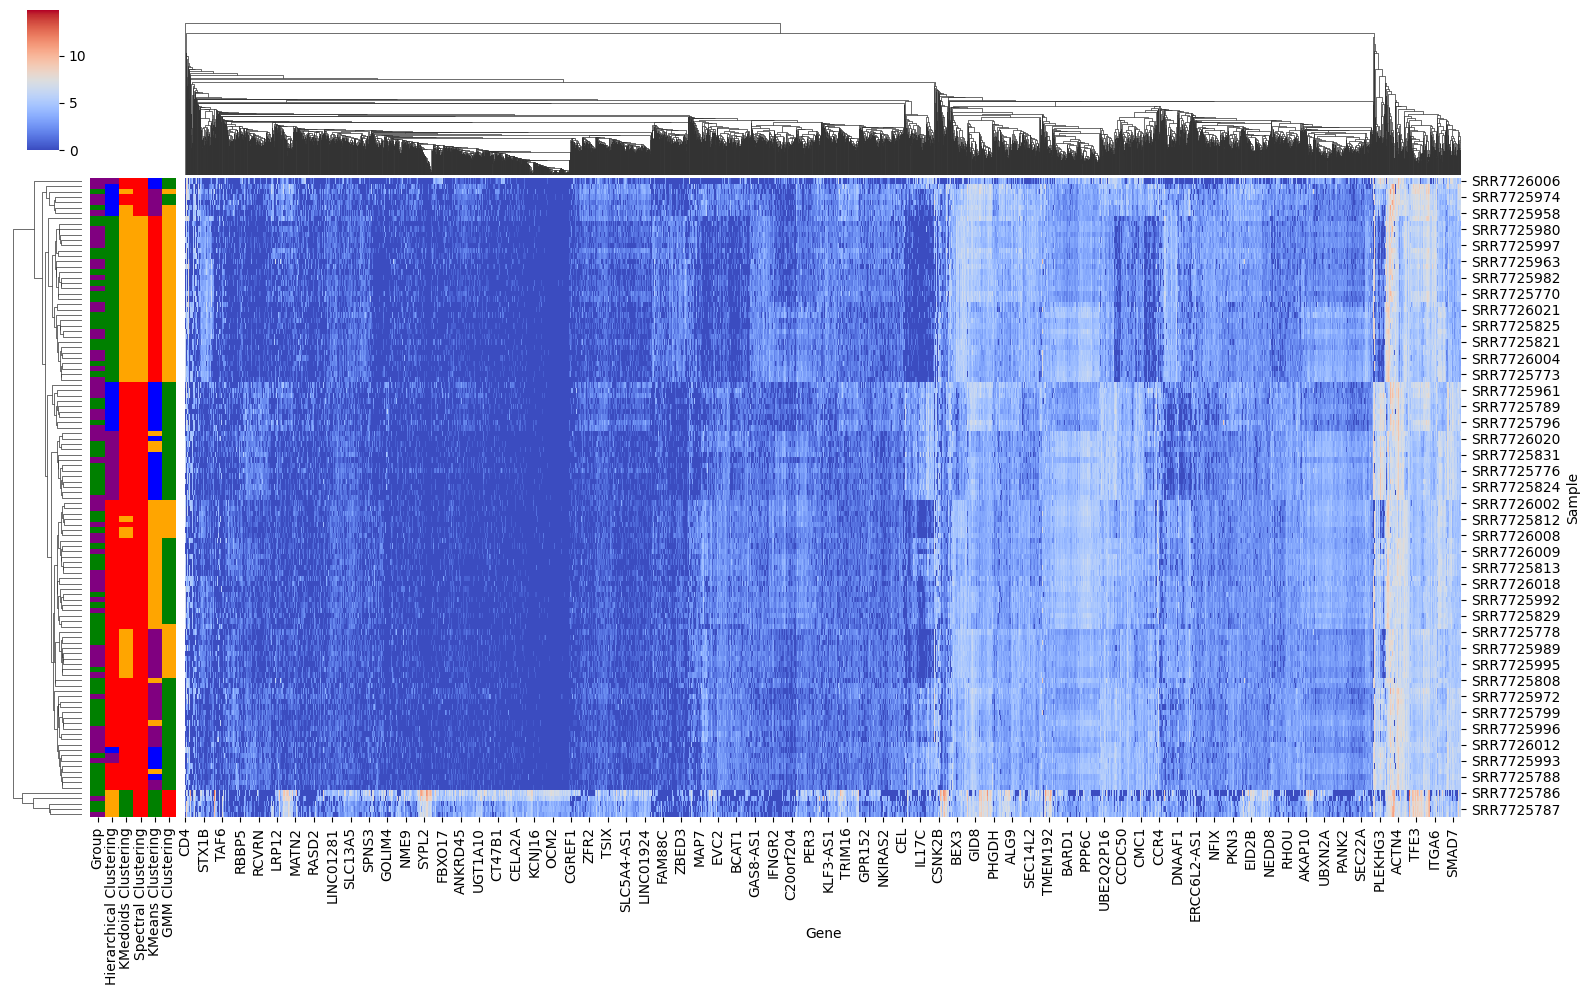

In [108]:

# Use seaborn to create the heatmap
sns.clustermap(df.iloc[:, :5000], row_colors=row_color_df, cmap="coolwarm",
               figsize=(16, 10), dendrogram_ratio=(0.05, 0.2), colors_ratio=(0.01, 0.2),
               cbar_pos=(0.02, 0.85, 0.02, 0.14))

# Show the heatmap
plt.savefig('assignment3_heatmap.png')
plt.show()